# **Proyecciones de empresas a un mes**

In [1]:
# Importando librerías
from main import *

## **Librerías y su propósito**

1. **OpenBB**
    - Sirve para obtener datos financieros en tiempo real, ya sean acciones, índices, ETFs y más.
    - Aquí se uso para descargar los precios históricos del ticker correspondiente y del S&P 500, necesarios para calcular retornos, volatilidad, beta, etc.

2. **Numpy**
    - Numpy es una librería de cálculo numérico.
        - Se usa para:
            - Logaritmos y operaciones vectorizadas (np.log).
            - Desviación estándar (std).
            - Generar números aleatorios (np.random.normal) para simulaciones Monte Carlo.
            - Cálculo de estadísticas como media, mediana y percentiles.

3. **Statsmodels**
    - Permite hacer análisis estadísticos avanzados, principalmente regresiones y tests estadísticos.
    - Aquí se usa para calcular la **beta** mediante una **regresión lineal OLS**, que es la base del modelo CAPM para estimar el rendimiento esperado de la acción.

---

## **Matemáticas empleadas**

1. **Retornos algorítmicos**
    - Se calculan como:

        $r_t = \ln \left( \frac{P_t}{P_{t-1}} \right)$

        donde $P_t$ es el precio de cierre del día $t$.

    - Esto convierte los precios en una serie aditiva y permite modelar el comportamiento como un **proceso estocástico**.

2. **Volatilidad histórica**
    - Desviación estándar de los retornos logarítmicos diarios:

        $\sigma_{diaria} = \mathrm{std} \left( r_t \right)$

    - Volatilidad anualizada:
        $\sigma_{anual} = \sigma_{diaria} * \sqrt{252}$

        donde 252 ≈ número de días de trading en un año.

3. **CAPM (Capital Asset Pricing Model)**
    - Regresión lineal para estimar **beta**:

        $r_{activo} = \alpha + \beta * r_{mercado} + \epsilon$

    - Rendimiento esperado según CAPM:

        $\mathbb{E}[R_{activo}] = R_f + \beta \left (\mathbb{E}[R_m] - R_f \right)$

        donde $R_f$ es la tasa libre de riesgo y $\mathbb{E}[R_m]$ el rendimiento esperado del mercado.

4. **Simulación Monte Carlo (GBM)**
    - Se usa un **Movimiento Browniano Geométrico (GBM por sus siglas en inglés)** para simular precios futuros:

        $S_T = S_0 * \exp \left ((\mu - \frac{1}{2} \sigma^2)T + \sigma\sqrt{T}Z \right)$

        - $S_0$ = Precio actual

        - $\mu$ = Rendimiento esperado

        - $\sigma$ = Volatilidad anual

        - $T$ = Horizonte temporal

        - $Z$ = Variable aleatoria normal

5. **Estadísticas de la simulación**

    - Media $\mathbb{E}[S_T]$, mediana y percentiles (P5, P95) para dar intervalos de confianza del precio futuro
    - Esto ayuda a visualizar la **distribución probable** de precios después de un mes de trading.

Acción: NVDA
Precio Actual: 174.17999267578125
Rendimiento E[S_T] probable 5.35%
E[S_T] ≈ 183.49100027354942
Mediana ≈ 183.217550976777
P5 ≈ 168.75071708393924   P95 ≈ 199.15374826033343
Rendimiento P5: -3.12%  P95: 14.34%


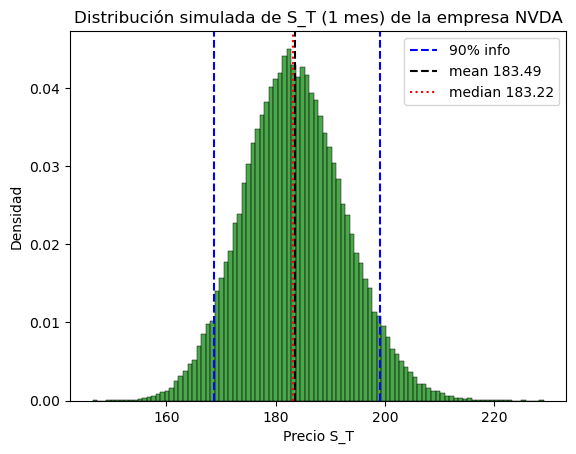

In [2]:
monte_carlo("NVDA", fecha_f="2025-09-01")

In [3]:
predict_forest("NVDA", fecha_f="2025-09-01")

Precio actual: 174.17999267578125
MAE: 5.45
RMSE: 6.84
Precio actual usado para predicción: 174.18
Precio probable a 22 días: 177.04
Rango probable de precio: $175.77 - $178.29
